# SVM Model with additional detailed analyis

Note: takes appprox 30-60 minutes to run whole code

Mounted at /content/drive
Loading dataset...
Loaded 0.60% of the dataset.
Loaded 1.20% of the dataset.
Loaded 1.80% of the dataset.
Loaded 2.40% of the dataset.
Loaded 3.00% of the dataset.
Loaded 3.61% of the dataset.
Loaded 4.21% of the dataset.
Loaded 4.81% of the dataset.
Loaded 5.41% of the dataset.
Loaded 6.01% of the dataset.
Loaded 6.61% of the dataset.
Loaded 7.21% of the dataset.
Loaded 7.81% of the dataset.
Loaded 8.41% of the dataset.
Loaded 9.01% of the dataset.
Loaded 9.61% of the dataset.
Loaded 10.22% of the dataset.
Loaded 10.82% of the dataset.
Loaded 11.42% of the dataset.
Loaded 12.02% of the dataset.
Loaded 12.62% of the dataset.
Loaded 13.22% of the dataset.
Loaded 13.82% of the dataset.
Loaded 14.42% of the dataset.
Loaded 15.02% of the dataset.
Loaded 15.62% of the dataset.
Loaded 16.22% of the dataset.
Loaded 16.82% of the dataset.
Loaded 17.43% of the dataset.
Loaded 18.03% of the dataset.
Loaded 18.63% of the dataset.
Loaded 19.23% of the dataset.
Loaded 19.8

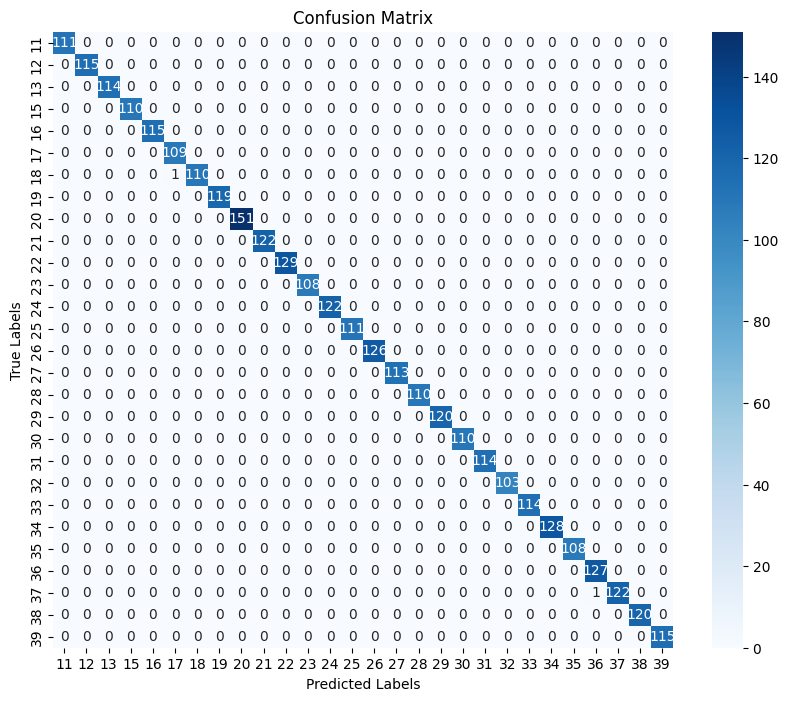

<ipython-input-1-ee545cc7497c>:116: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Training", "Prediction"], y=[train_time, prediction_time], palette="viridis", ax=ax)


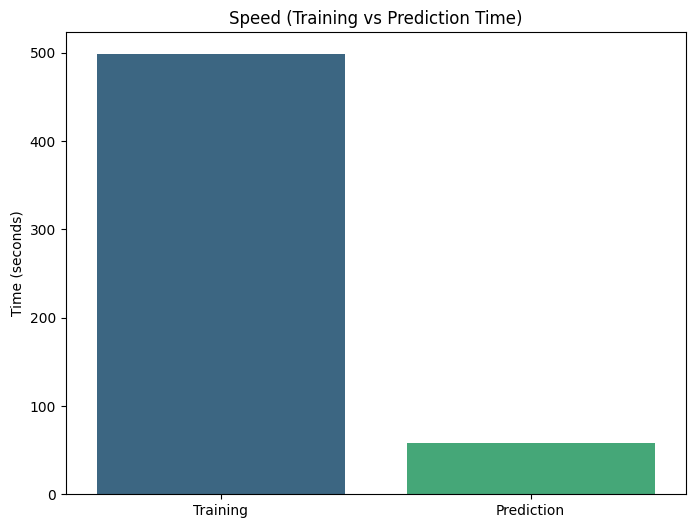

<ipython-input-1-ee545cc7497c>:123: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Training", "Prediction"], y=[train_memory_usage, prediction_memory_usage], palette="coolwarm", ax=ax)


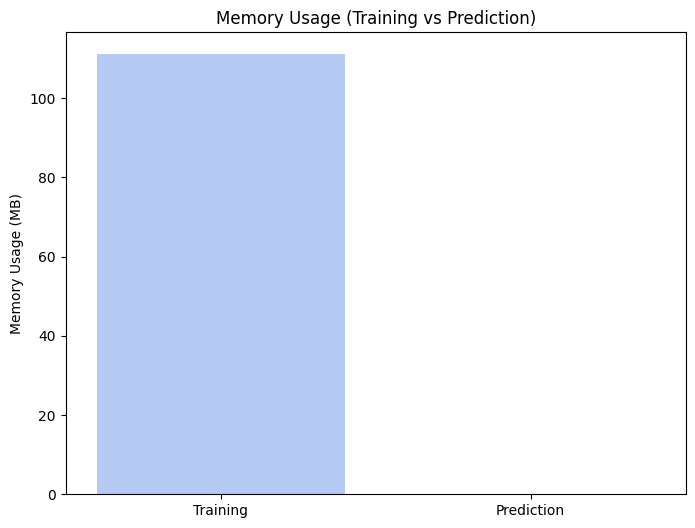

Accuracy: 99.94%
F1-Score: 1.00
Precision: 1.00
Recall: 1.00
Cross-Validation Accuracy: 99.83%


<ipython-input-1-ee545cc7497c>:170: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette="Blues_d")


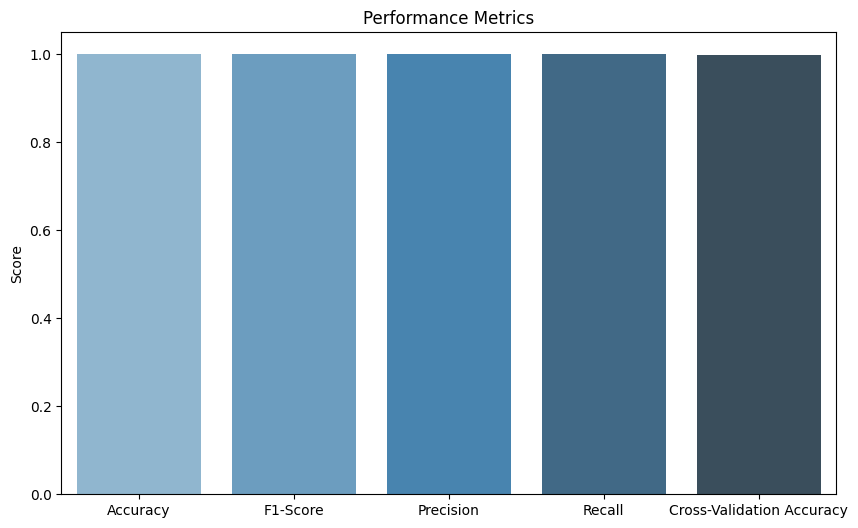

<ipython-input-1-ee545cc7497c>:181: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Training", "Prediction"], y=[train_time, prediction_time], palette="viridis", ax=ax[0])
<ipython-input-1-ee545cc7497c>:186: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Training", "Prediction"], y=[train_memory_usage, prediction_memory_usage], palette="coolwarm", ax=ax[1])


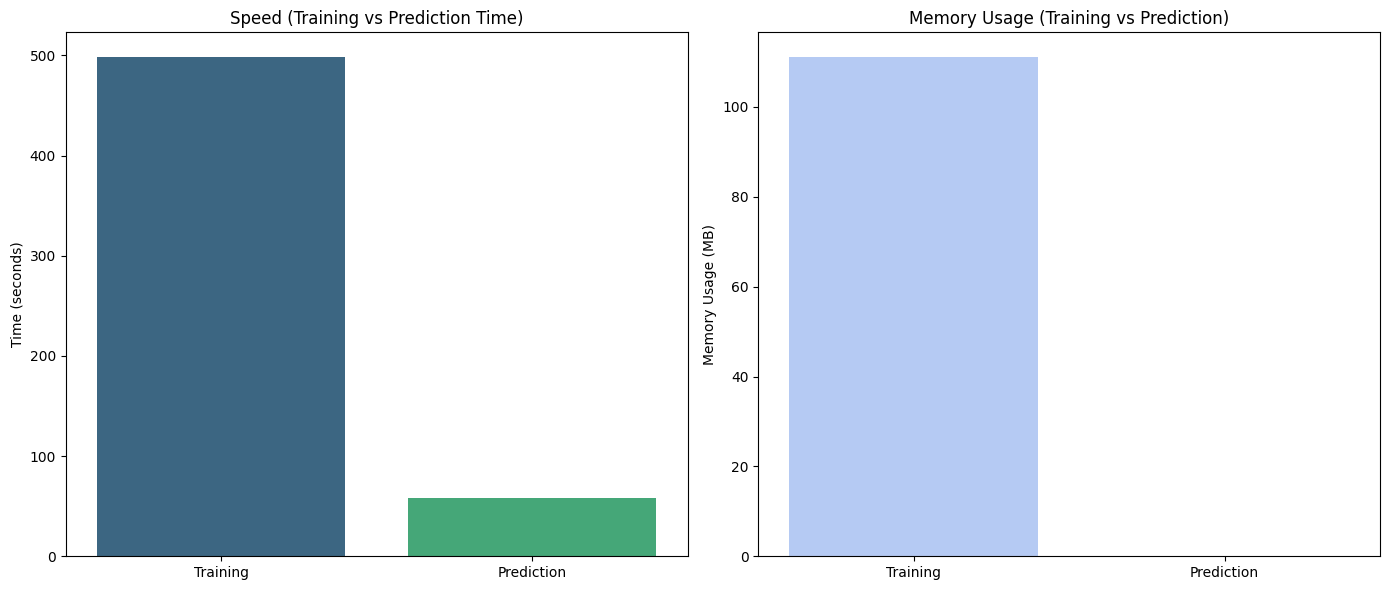

In [ ]:
import cv2
import numpy as np
import os
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score
import time
import psutil
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive (optional, falls du das Dataset auf Google Drive gespeichert hast)
from google.colab import drive
drive.mount('/content/drive')

# Set the path to the dataset directory on Google Drive (ersetze den Pfad nach Bedarf)
dataset_path = '/content/drive/My Drive/ExtendedYaleB'

# Image size for preprocessing
image_size = (64, 64)

# Initialize empty lists to hold feature data (X) and labels (y)
X, y = [], []

# Parameters
image_count = 0  # Counter to track the number of loaded images
total_images = sum([len(files) for r, d, files in os.walk(dataset_path)])  # Total number of images in the dataset

# Load the dataset
print("Loading dataset...")
for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(folder_path):
        label = int(folder.replace('yaleB', ''))  # Assign label based on folder name

        # Loop through each image file in the folder
        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale

            if img is None:
                continue  # Skip any images that fail to load

            img = cv2.resize(img, image_size)  # Resize image to the defined size
            X.append(img.flatten())  # Flatten image into a 1D array and add it to the features list
            y.append(label)  # Add corresponding label to the labels list
            image_count += 1

            # Display progress
            if image_count % 100 == 0:
                print(f"Loaded {image_count / total_images * 100:.2f}% of the dataset.")

# Convert feature and label lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Display information about the loaded dataset
print(f"Dataset loaded with {X.shape[0]} images and {X.shape[1]} features per image.")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the size of the training and testing sets
print(f"Training set size: {X_train.shape[0]} images")
print(f"Test set size: {X_test.shape[0]} images")

# Train the SVM model with an RBF kernel
svm_model = SVC(kernel='rbf', gamma='scale', C=2.0, probability=True)

# Function to measure memory usage
def memory_usage():
    process = psutil.Process(os.getpid())
    return process.memory_info().rss / 1024 ** 2  # In MB

# Function to evaluate and visualize performance
def evaluate_performance(model, X_train, y_train, X_test, y_test):
    # Measure time and memory usage for training
    start_memory = memory_usage()
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    end_memory = memory_usage()
    train_memory_usage = end_memory - start_memory

    # Measure time and memory usage for prediction
    start_memory = memory_usage()
    start_time = time.time()
    y_pred = model.predict(X_test)
    prediction_time = time.time() - start_time
    end_memory = memory_usage()
    prediction_memory_usage = end_memory - start_memory

    # Accuracy Score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Visualize confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

    # Visualize training and prediction times
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    sns.barplot(x=["Training", "Prediction"], y=[train_time, prediction_time], palette="viridis", ax=ax)
    ax.set_title("Speed (Training vs Prediction Time)")
    ax.set_ylabel("Time (seconds)")
    plt.show()

    # Visualize memory usage
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    sns.barplot(x=["Training", "Prediction"], y=[train_memory_usage, prediction_memory_usage], palette="coolwarm", ax=ax)
    ax.set_title("Memory Usage (Training vs Prediction)")
    ax.set_ylabel("Memory Usage (MB)")
    plt.show()

    return accuracy, train_time, prediction_time, train_memory_usage, prediction_memory_usage

 # Call the evaluate_performance function to train the model and visualize the results
accuracy, train_time, prediction_time, train_memory_usage, prediction_memory_usage = evaluate_performance(svm_model, X_train, y_train, X_test, y_test)

########################################################################
# Part2
########################################################################
# Function to evaluate extended performance metrics
def evaluate_extended_performance(model, X_train, y_train, X_test, y_test):
    # Generate predictions for the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Calculate weighted F1-Score
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"F1-Score: {f1:.2f}")

    # Calculate precision and recall
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")

    # Perform cross-validation for accuracy (optional, for more reliable performance estimation)
    cross_val_score_result = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"Cross-Validation Accuracy: {cross_val_score_result.mean() * 100:.2f}%")

    return accuracy, f1, precision, recall, cross_val_score_result.mean()

# Example usage of the extended evaluation function
accuracy, f1, precision, recall, cross_val_accuracy = evaluate_extended_performance(svm_model, X_train, y_train, X_test, y_test)

# Visualization of the extended performance metrics
metrics = ['Accuracy', 'F1-Score', 'Precision', 'Recall', 'Cross-Validation Accuracy']
values = [accuracy, f1, precision, recall, cross_val_accuracy]

# Create a bar plot for the performance metrics
plt.figure(figsize=(10, 6))
sns.barplot(x=metrics, y=values, palette="Blues_d")
plt.title("Performance Metrics")
plt.ylabel("Score")
plt.show()

# Optional: Visualize training and prediction time vs memory usage
def visualize_performance_metrics(train_time, prediction_time, train_memory_usage, prediction_memory_usage):
    # Create subplots for speed and memory usage
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    # Visualization of training and prediction time
    sns.barplot(x=["Training", "Prediction"], y=[train_time, prediction_time], palette="viridis", ax=ax[0])
    ax[0].set_title("Speed (Training vs Prediction Time)")
    ax[0].set_ylabel("Time (seconds)")

    # Visualization of memory usage
    sns.barplot(x=["Training", "Prediction"], y=[train_memory_usage, prediction_memory_usage], palette="coolwarm", ax=ax[1])
    ax[1].set_title("Memory Usage (Training vs Prediction)")
    ax[1].set_ylabel("Memory Usage (MB)")

    plt.tight_layout()
    plt.show()

visualize_performance_metrics(train_time, prediction_time, train_memory_usage, prediction_memory_usage)